In [1]:
import numpy as np
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
	MaxAbsScaler,
	RobustScaler,
	PowerTransformer,
	QuantileTransformer,
	)
import pandas as pd
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import seaborn as sns

# Linear scalers

### StandardScaler: `StandardScaler()`

In [2]:
# 
X = np.array([[4, -4, -9],
              [2, -1,  0],
              [4,  2,  2],
              [2,  5,  3]])
print(StandardScaler().fit_transform(X))

[[ 1.         -1.34164079 -1.68654809]
 [-1.         -0.4472136   0.21081851]
 [ 1.          0.4472136   0.63245553]
 [-1.          1.34164079  0.84327404]]


### MinMaxScaler: `MinMaxScaler()`

In [3]:
X = np.array([[4, -4, -9],
              [2, -1,  0],
              [4,  2,  2],
              [2,  5,  3]])
print(MinMaxScaler().fit_transform(X))

[[1.         0.         0.        ]
 [0.         0.33333333 0.75      ]
 [1.         0.66666667 0.91666667]
 [0.         1.         1.        ]]


### MaxAbsScaler: `MaxAbsScaler()`

In [4]:
X = np.array([[4, -4, -9],
              [2, -1,  0],
              [4,  2,  2],
              [2,  5,  3]])
print(MaxAbsScaler().fit_transform(X))

[[ 1.         -0.8        -1.        ]
 [ 0.5        -0.2         0.        ]
 [ 1.          0.4         0.22222222]
 [ 0.5         1.          0.33333333]]


### RobustScaler: `RobustScaler()`

In [5]:
X = np.array([[4, -4, -9],
              [2, -1,  0],
              [4,  2,  2],
              [2,  5,  3]])
print(RobustScaler().fit_transform(X))

[[ 0.5        -1.         -2.22222222]
 [-0.5        -0.33333333 -0.22222222]
 [ 0.5         0.33333333  0.22222222]
 [-0.5         1.          0.44444444]]


# Non-linear scalers


### Generate data

In [6]:
np.random.seed(42)

# Parameters for skewed distribution
skewness1 = -15
mean1 = 0
std_dev1 = 1
size1 = 300

skewness2 = 0
mean2 = 2
std_dev2 = 1
size2 = 300

# Generate skewed data
data1 = skewnorm.rvs(a=skewness1, loc=mean1, scale=std_dev1, size=size1)
data2 = skewnorm.rvs(a=skewness2, loc=mean2, scale=std_dev2, size=size2)

# Add random noise
noise_level = 0.3
noise = np.random.normal(0, noise_level, size1)
data_with_noise1 = data1+noise
data_with_noise2 = data2+noise
data_with_noise = np.append(data_with_noise1, data_with_noise2)

# Convert to DataFrame
data_df = pd.DataFrame(data_with_noise, columns=["Value"])

### PowerTransformer: `PowerTransformer()`

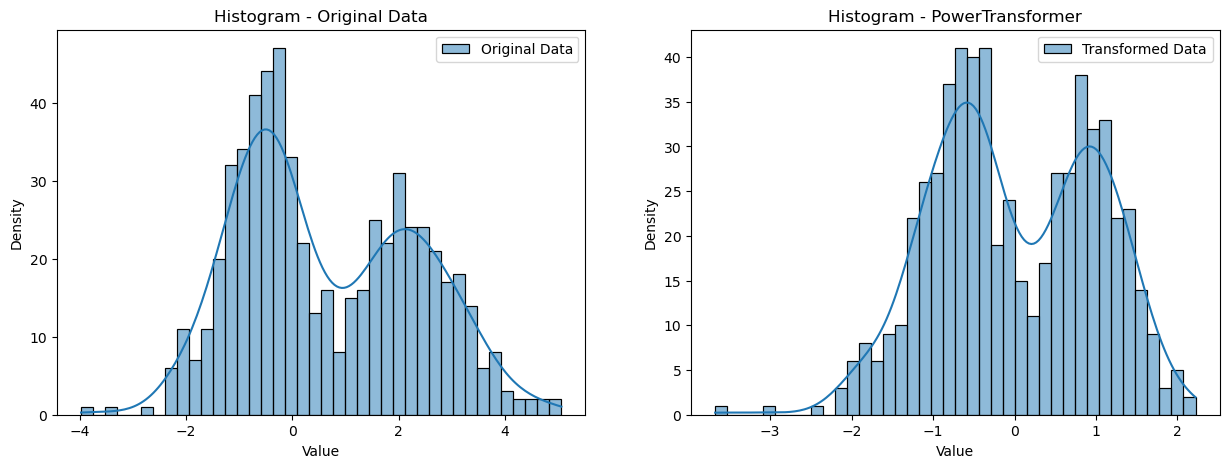

In [7]:
# PowerTransformer
X_std = PowerTransformer().fit_transform(data_df)

# Plot the data with histogram and KDE line
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data_df, bins=40, kde=True, ax=ax[0], label="Original Data")
ax[0].set_title("Histogram - Original Data")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Density")
ax[0].legend()

sns.histplot(X_std, bins=40, kde=True, ax=ax[1], label="Transformed Data")
ax[1].set_title("Histogram - PowerTransformer")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Density")
ax[1].legend()

# Adjust layout
plt.show()

### QuantileTransformer: `QuantileTransformer()`

  warnings.warn(


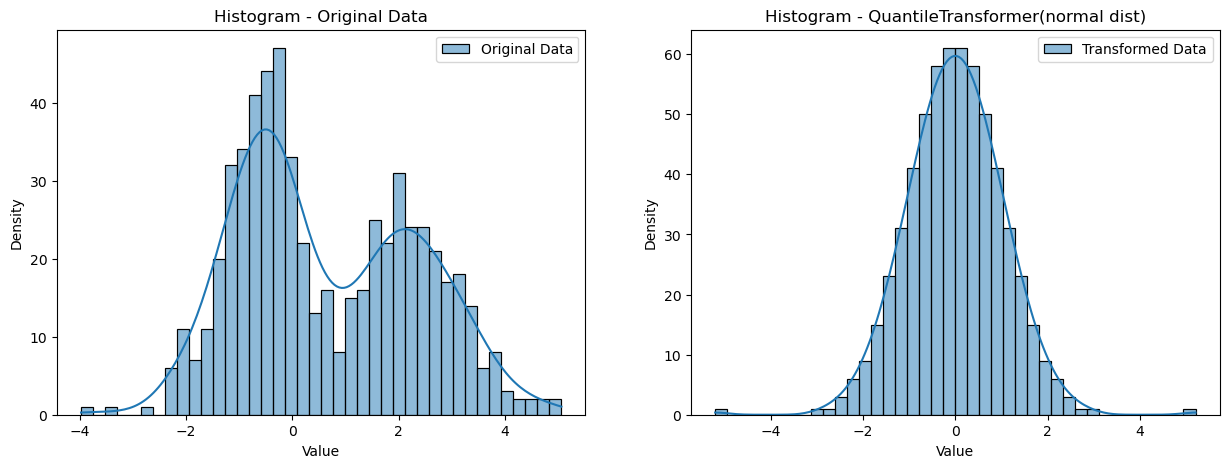

In [9]:
X_std = QuantileTransformer(output_distribution="normal").fit_transform(data_df)

# Plot the data with histogram and KDE line
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data_df, bins=40, kde=True, ax=ax[0], label="Original Data")
ax[0].set_title("Histogram - Original Data")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Density")
ax[0].legend()

sns.histplot(X_std, bins=40,  kde=True, ax=ax[1], label="Transformed Data")
ax[1].set_title("Histogram - QuantileTransformer(normal dist)")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Density")
ax[1].legend()

plt.show()

  warnings.warn(


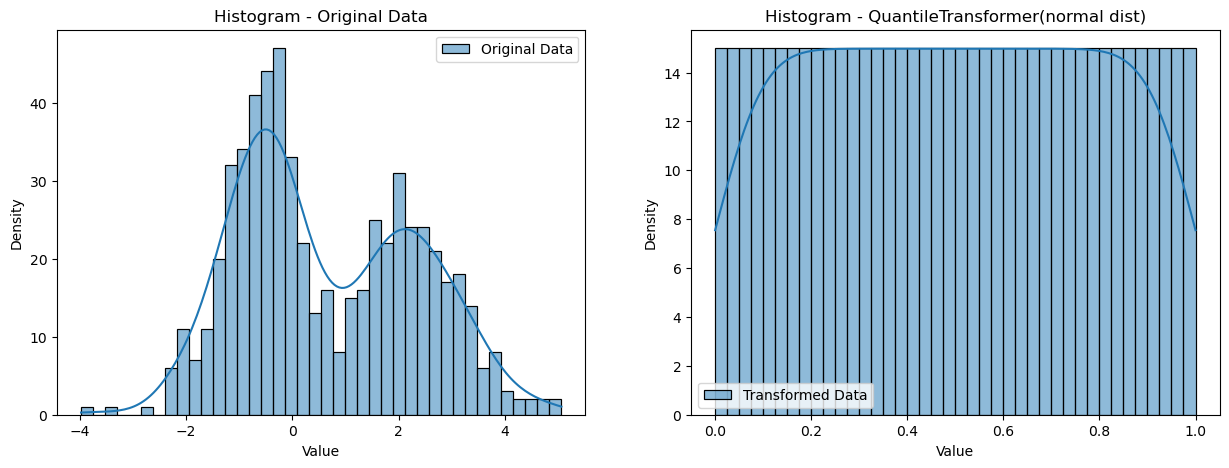

In [10]:
X_std = QuantileTransformer(output_distribution="uniform").fit_transform(data_df)

# Plot the data with histogram and KDE line
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data_df, bins=40, kde=True, ax=ax[0], label="Original Data")
ax[0].set_title("Histogram - Original Data")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Density")
ax[0].legend()

sns.histplot(X_std, bins=40,  kde=True, ax=ax[1], label="Transformed Data")
ax[1].set_title("Histogram - QuantileTransformer(normal dist)")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Density")
ax[1].legend()

plt.show()